<a href="https://colab.research.google.com/github/youngsoomoon/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 생존율 예측

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

In [2]:
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 데이터 파일 불러오기
* 파일을 직접 업로드 하는 방법
* 구글 드라이브에서 가져오는 방법

In [ ]:
# #파일 직접 업로드하기
# from google.colab import files
# train_file = files.upload()

In [ ]:
# test_file = files.upload()

In [ ]:
# submit_file = files.upload()

In [3]:
# 구글드라이브에서 가져오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import io

In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/[kaggle]Titanic/Titanic_Data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/[kaggle]Titanic/Titanic_Data/test.csv')

In [6]:
df_submit = pd.read_csv('/content/drive/MyDrive/[kaggle]Titanic/Titanic_Data/gender_submission.csv')

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 데이터 요약값 보기

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 결측치 파악하기

In [ ]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

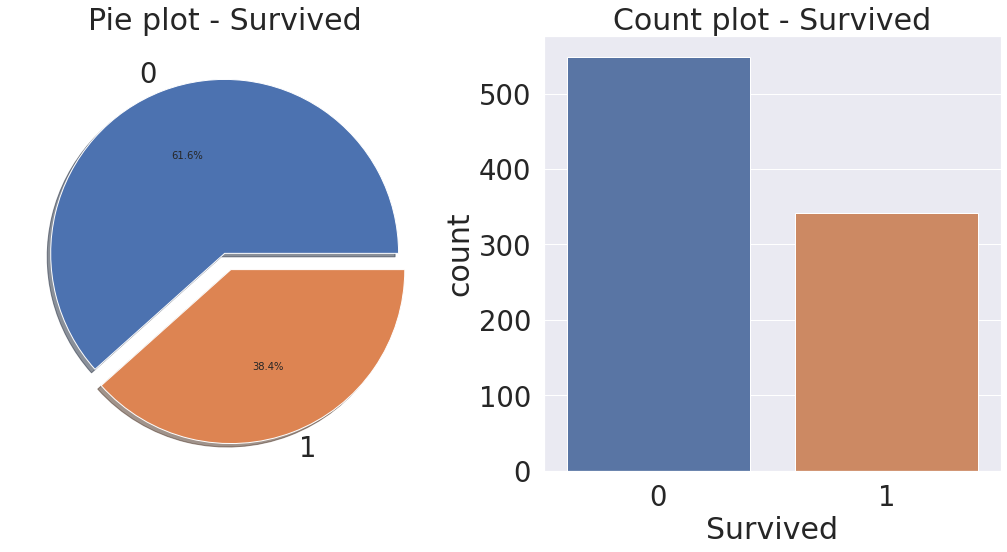

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

'''
df.plot.pie() 매개변수
ratio = [] : 원주율
labels = [] : 라벨
autopct='%.1f%%' : 부채꼴안에 표시될 숫자 형식 , 소수 첫째자리와 % 표시
strangle = : 부채꼴이 시작할 각도
counterclock = True/False : False일때 시계방향순서로 영역표시
explode=[] : 부채꼴이 중심으로부터 벗어나는거리
shadow = True/False : 그림자 유무
colors = [] : 색깔지정
wedgeprops = {} : 부채꼴 영역의 스타일 지정
'''

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## Pclass

In [ ]:
# pclass 그룹 별 데이터 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
# pclass 그룹 별 생존자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
# mean을 사용하여 생존율 구하기
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


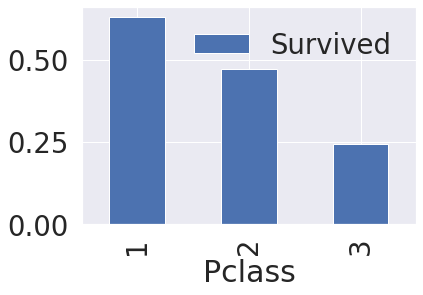

In [ ]:
# 시각화
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

결과 : Pclass에 따라 생존여부가 달라지는 것을 알 수 있다.

## Sex

성별에 따른 생존율 분석

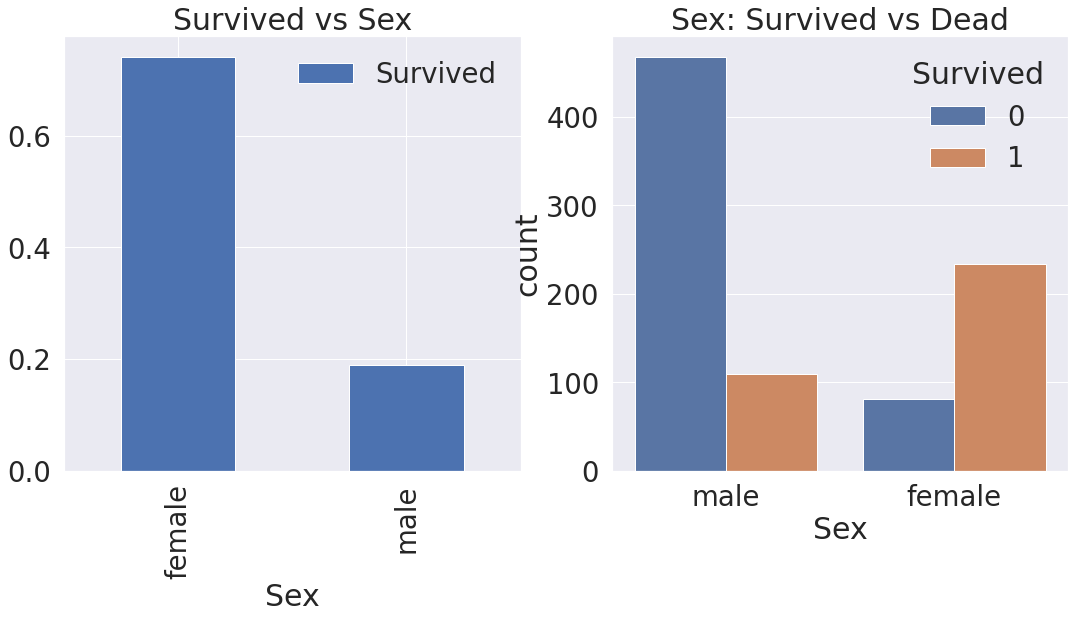

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

결과 : 여자의 생존율이 더욱 높은 것으로 보아 성별도 생존에 영향을 미치는 특성임을 알 수 있다.

## Pclass & Sex
Pclass와 성별에 따른 생존율 그래프

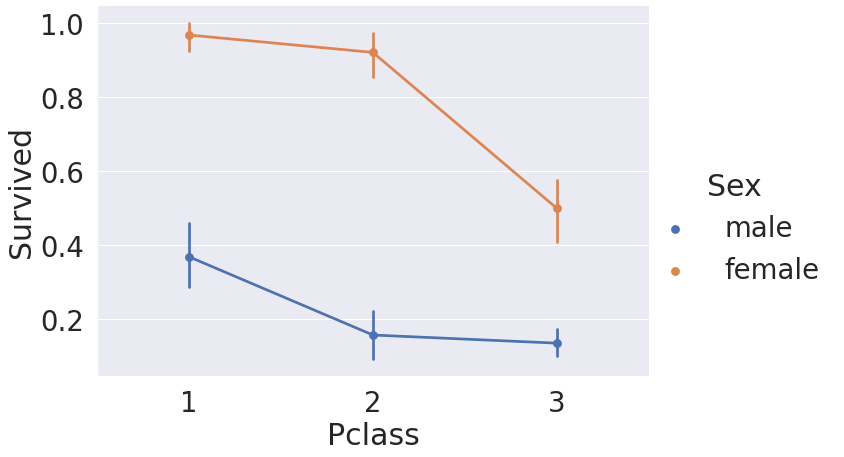

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

format() : 숫자 자릿수 , 딕셔너리 형태로 지정 {주소값:자릿수}


## Age

In [12]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


### **kde**<br>
Kernel Density Estimator의 약자로 커널 밀도 추정이라는 뜻이다.<br>
데이터의 분포를 확인하기위하여 사용되고, 곡선으로 그려진다는 특징이 있다.

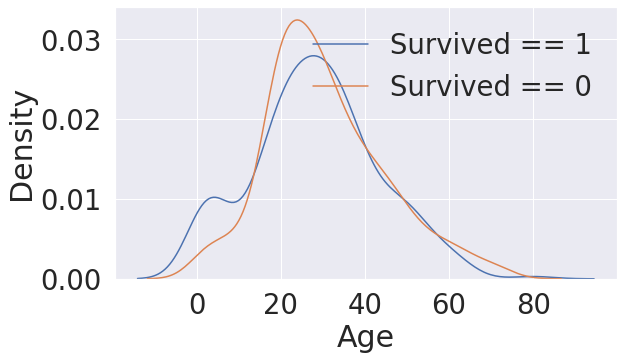

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

그래프를 보면 15세 미만의 구간에서 생존율이 상대적으로 높고<br>
20~30세 구간에서는 생존율이 낮은 것을 알 수 있다.

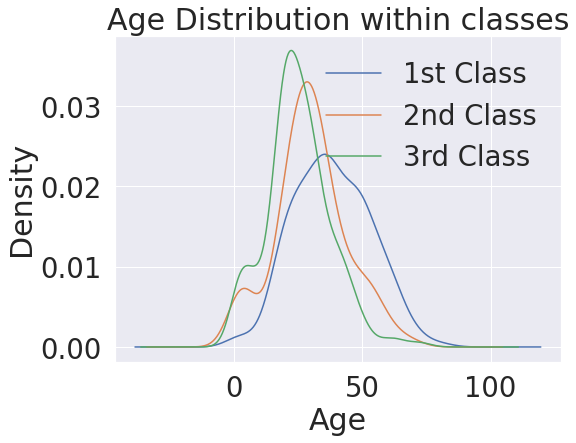

In [ ]:
# 나이에 따른 클래스별 분포
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

* 특징 <br>
나이가 많아질 수록 클래스가 높아진다<br>


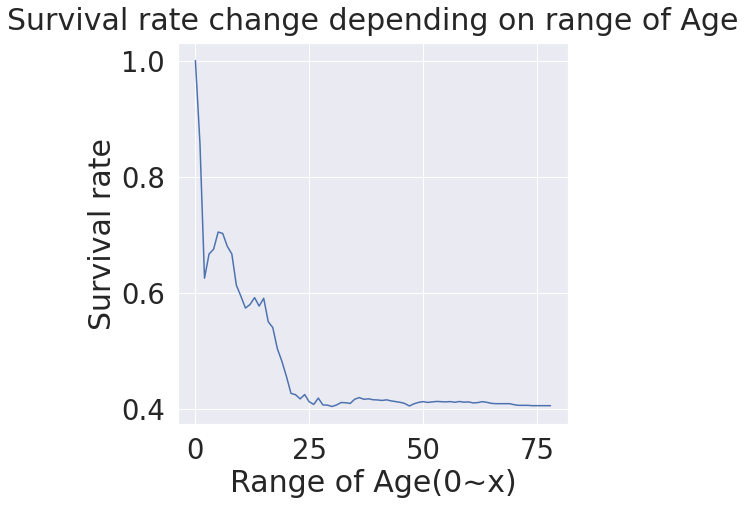

In [ ]:
# 누적확률을 이용하여 나이에 따른 생존율 시각화
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

결과 : 나이가 어릴수록 생존율이 높은것을 조금 더 확실하게 알 수 있다.

## Embarked (탑승항구)

In [ ]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

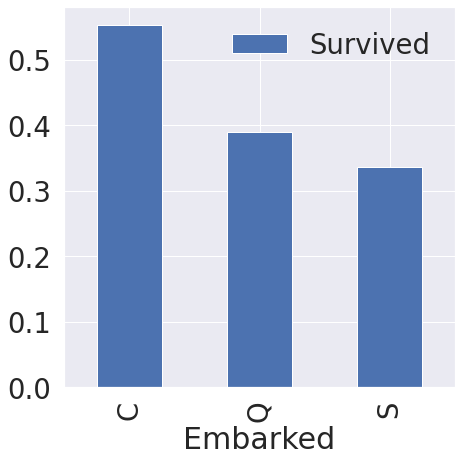

In [ ]:
# 탑승항구에 따른 생존율 그래프
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

결과 : 항구별 생존율의 차이가 크진않지만 나타나고 있는 것을 알 수 있고, C항구의 생존율이 가장 높았다.

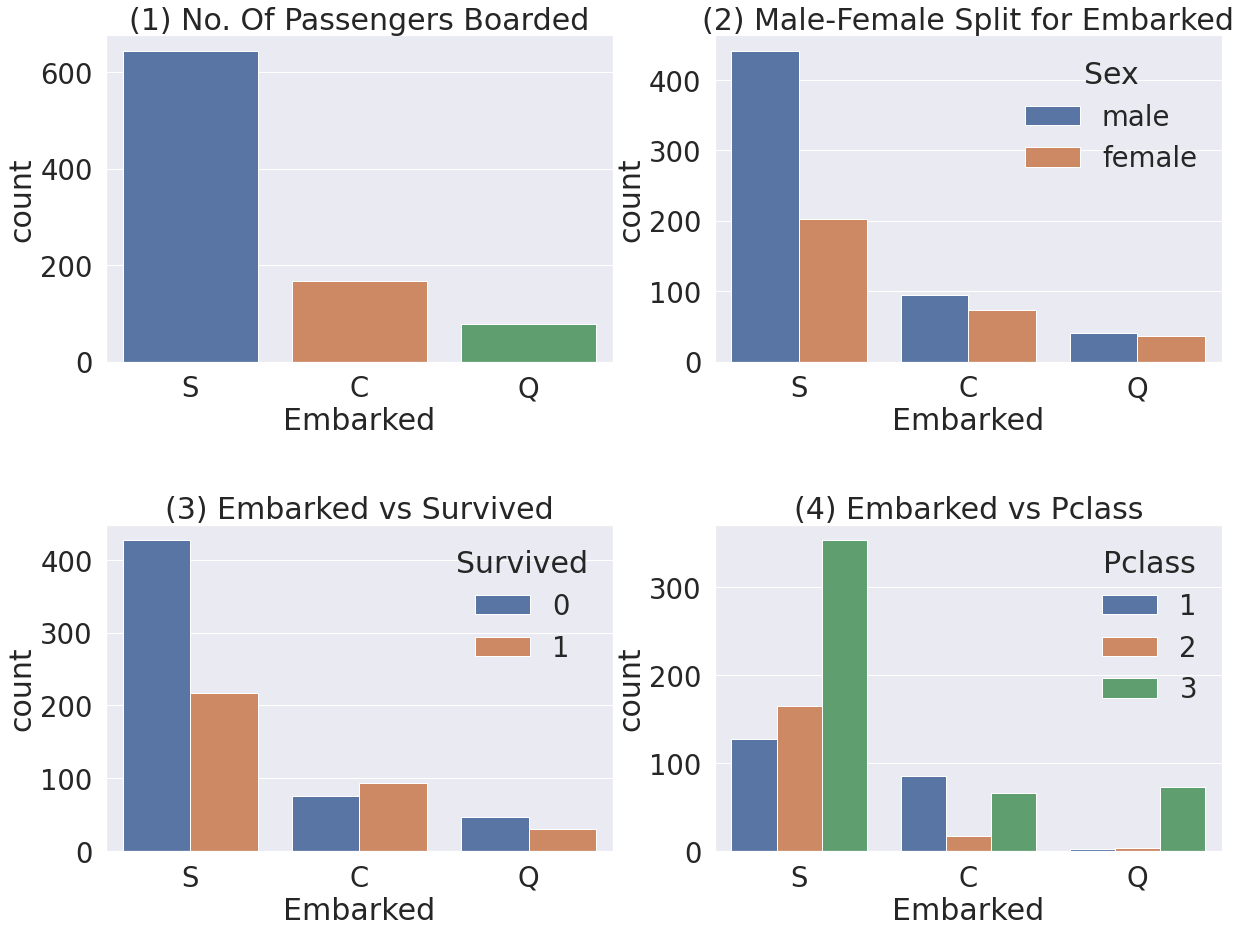

In [ ]:
'''
항구별 탑승자 수 그래프
성별로 나눈 항구별 탑승자 수 그래프
생존여부로 나눈 항구별 탑승자 수 그래프
클래스로 나눈 항구별 탑승자 수 그래프
'''
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* 결과 <br>
Fitcher(1) = S항구에서 가장 많은 사람들이 탑승했다.<br>
Fitcher(2) = S항구에서 남자의 비율이 더 많고 나머지는 비슷하다.<br>
Fitcher(3) = S항구에서 가장 생존율이 낮다. <br>
Fitcher(4) = C는 높은클래스의 사람이 많아서 생존율이 높은것으로 짐작되고, S항구는 낮은 클래스가 많아서 생존율이 낮은것으로 짐작된다.

## Family - Sibsp(형제 자매) + Parch(부모,자녀)

Sibsp 와 Parch를 합치면 함께 탑승한 가족의 수가 된다.<br>
이를 통해 FamilySize라는 새로운 피쳐를 생성한다.

In [13]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [14]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


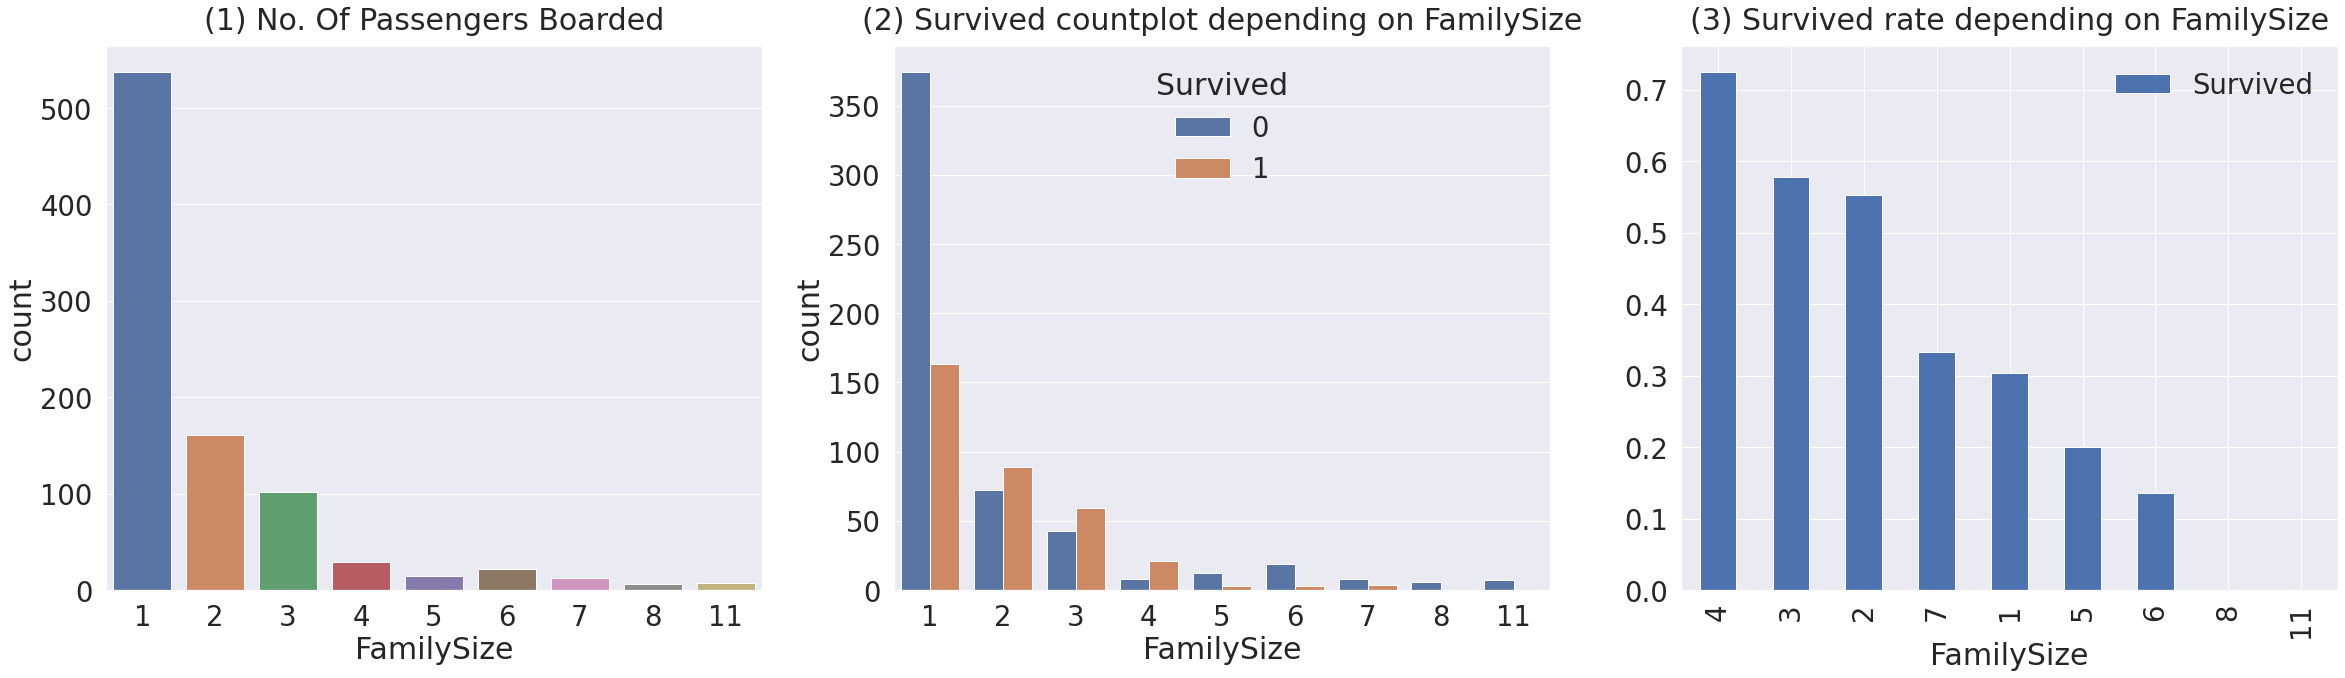

In [15]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

# plt.subplots_adjust()은 서브플롯간 간격 변경함수
# wspace는 축 너비 , hspace는 높이 비율
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* 결과 <br>
Figure(1) - 가족의 크기가 1~11명까지 있다. 1명이 가장많고 그다음이 2,3,4명이다.<br>
Figure(2),(3) - 가족크기 별 생존여부이다. 생존확률로 보았을때 4명일때가 가장 확률이 높았다.

## Fare (탑승요금)

### skewness
비대칭도라는 뜻으로, 데이터의 분포가 한쪽으로 치우쳐져있는 정도를 의미한다.

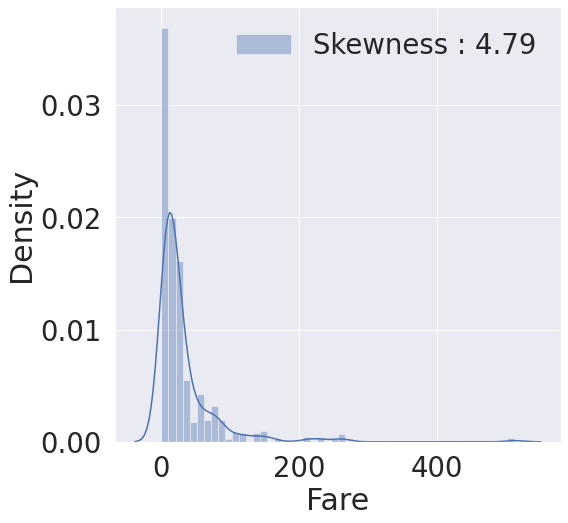

In [ ]:
# 히스토그램을 통해 데이터 분포를 확인한다.
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
# 레전드의 위치를 자동으로 최적의 위치하기위해서 loc='best'사용
g = g.legend(loc='best')

### FeatureEngineerning<br>
모델의 학습이나 성능을 높이기위해 피쳐들을 조작하거나 추가하는 것을 FeatureEngineering이라고한다.<br>
현재 모델에도 비대칭성이 높게 측정되기때문에 Fare에 log를 취해줌으로 비대칭성을 낮춰준다.

In [16]:
# test데이터셋의 Fare피쳐에 null값이 한개 존재하기때문에 평균값으로 넣어준다.
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [17]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

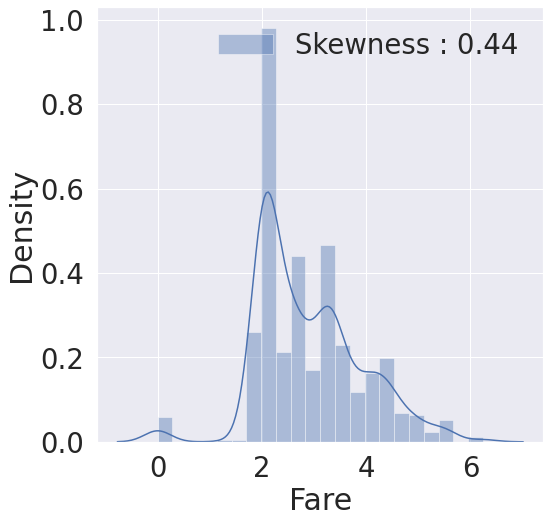

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## Cabin (좌석)
Cabin은 Nan이 약 80%이기 때문에, 활용에 적합하지 않다.

In [19]:
### Cabin 피쳐의 Null 비율 계산
df_train["Cabin"].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [20]:
df_train.head()[["PassengerId", "Cabin"]]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


## Ticket
Ticket에는 Nan은 없으나, 다양한 형태의 값들이 존재한다.<br>
실제 모델에 사용하기 위해서는 아이디어를 통해 일련의 작업들을 거쳐야 한다.

In [ ]:
df_train['Ticket'].value_counts()

1601                  7
CA. 2343              7
347082                7
3101295               6
CA 2144               6
                     ..
111320                1
2680                  1
STON/O 2. 3101273     1
SOTON/O.Q. 3101307    1
PC 17610              1
Name: Ticket, Length: 681, dtype: int64

# 특성 공학 (Feature Engineering)

## Fill Null

In [21]:
df_train["Age"].isnull().sum()

177

### 정규표현식
문자열.extract()로 추출 <br>
() 안에는 추출원하는 문자열 형태 지정<br>
'([A-Za-z]+)\.' 는 A부터Z , a부터z까지 입력된문자 + .으로 끝나는 문자 추출

In [22]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [23]:
# crosstab은 원하는 컬럼으로 교차표를 만들어주는 메소드
# .T를통해 행/열 변형
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [24]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [25]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


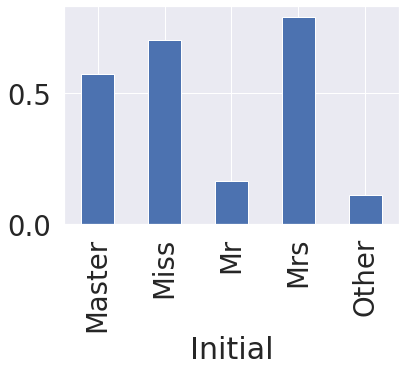

In [26]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

Statistics를 활용하여 Null을 채운다.<br>
statistics 는 train data의 것을 의미

### 각 initial 그룹별 Age 평균 값으로 null 채우기

In [27]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [28]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [29]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

* 결과 : train 과 test 셋에 Age의 null은 모두 없앴음

## Fill Null in Embarked

In [30]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [31]:
# 가장 많은 탑승객이 있었던 S항구로 null값 채우기
df_train['Embarked'].fillna('S', inplace=True)

In [32]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

## Change Age

df.apply() 함수를 사용하여 나이별 카테고리 나누기 

In [33]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [34]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

## Initial & Embarked & Sex 수치화

현재 Initial은 Mr, Mrs, Miss, Master, Other 총 5개로 이루어져있다.<br>
이런 카테고리로 표현되어져 있는 데이터를 모델에 인풋 시킬때는 컴퓨터가 인식할 수 있도록 **수치화** 시켜야 한다.

In [35]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

Embarked & Sex 도 동일한 방법으로 **수치화**

In [37]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [38]:
df_train['Embarked'].isnull().any() , df_train['Embarked'].dtypes

(True, dtype('float64'))

In [39]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

## 히트맵그래프를 통해 Feature간의 상관관계 확인하기

r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,<br>
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,<br>
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,<br>
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,<br>
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,<br>
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,<br>
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계


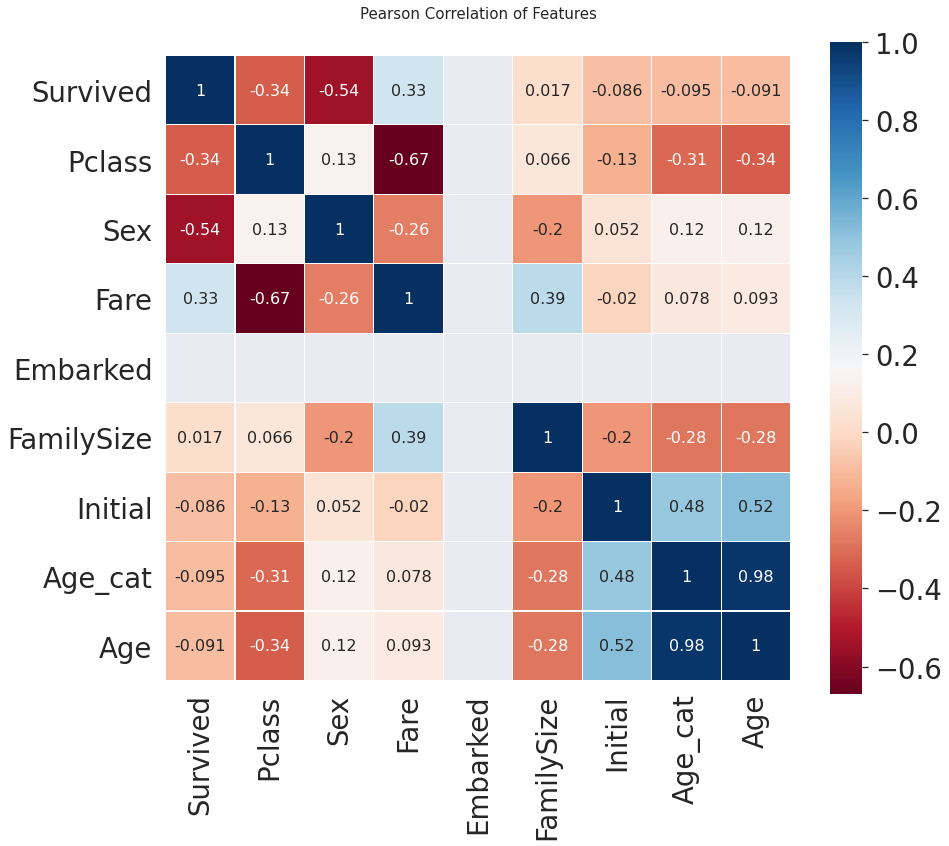

In [40]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']] 

# plt.cm.색깔명 은 색깔을 자동으로 지정해주는 함수
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

**결과** : 상관관계를 보이는것을 뽑아보자면 <br>
Survived 와 Fare : -0.54<br>
Survived 와 Sex : -0.34<br>
Pclass 와 Fare : -0.67<br>
Pclass 와 Age : -0.34<br>
등이 있다.

## One-hot encoding on Initial and Embarked
모델의 성능을 높이기 위해 one-hot encoding을 해준다.<br>
One-hot encoding 은 위 카테고리를 다음과 같이(0, 1) 로 이루어진 5차원의 벡터로 나타내는 것을 말합니다.<br>



| |Initial_Master|Initial_Miss|Initial_Mr|Initial_Mrs|Initial_Other|
|---|:---:|:---:|:---:|:---:|:---:|
|Master|1|0|0|0|0|
|Miss|0|1|0|0|0|
|Mr|0|0|1|0|0|
|Mrs|0|0|0|1|0|
|Other|0|0|0|0|1|

### one-hot encoding의 필요성
수치화는 간단히 Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4 로 매핑해주는 것을 말한다.<br>
수치화된 데이터를 입력했을때 Master와 Miss가 가까운관계, Mrs,Other이 가까운 관계로 해석될 수 있다.<br>
one-hot encoding을 이용하여 각 클래스간 연관성을 독립적으로 만들어줌을써 각 클래스간의 상관 관계를 없애준다.

### get_dummies
위와 같은 작업을 직접 코딩할 수도 있지만 pandas의 get_dummies를 사용하면 쉽게 해결가능하다.<br>
prefix를 통해 공통접두사 추가해준다

In [41]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [42]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,NaN,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,NaN,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,NaN,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,NaN,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,NaN,1,3,0,0,1,0,0


In [43]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## Drop Columns
필요없는 피쳐 삭제

In [44]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [45]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   FamilySize  891 non-null    int64  
 6   Age_cat     891 non-null    int64  
 7   Initial_0   891 non-null    uint8  
 8   Initial_1   891 non-null    uint8  
 9   Initial_2   891 non-null    uint8  
 10  Initial_3   891 non-null    uint8  
 11  Initial_4   891 non-null    uint8  
 12  Embarked_0  891 non-null    uint8  
 13  Embarked_1  891 non-null    uint8  
 14  Embarked_2  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 55.8 KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   FamilySize  418 non-null    int64  
 5   Age_cat     418 non-null    int64  
 6   Initial_0   418 non-null    uint8  
 7   Initial_1   418 non-null    uint8  
 8   Initial_2   418 non-null    uint8  
 9   Initial_3   418 non-null    uint8  
 10  Initial_4   418 non-null    uint8  
 11  Embarked_0  418 non-null    uint8  
 12  Embarked_1  418 non-null    uint8  
 13  Embarked_2  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 23.0 KB


# 모델 개발 및 학습

In [46]:
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier 입니다. 
from sklearn import metrics # 모델의 평가를 위해서 씁니다
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수입니다.

## 학습을위한 train, valid, test set 분류

train은 훈련데이터셋<br>
valid는 검증데이터셋<br>
test는 학습데이터셋<br>

In [47]:
df_train.drop('Survived', axis=1).values

array([[ 3.,  1., 22., ...,  1.,  0.,  0.],
       [ 1.,  0., 38., ...,  0.,  1.,  0.],
       [ 3.,  0., 26., ...,  0.,  0.,  0.],
       ...,
       [ 3.,  0., 22., ...,  0.,  0.,  0.],
       [ 1.,  1., 26., ...,  1.,  0.,  0.],
       [ 3.,  1., 32., ...,  1.,  0.,  0.]])

In [48]:
# train 에는 Survived 컬럼을 제외한 나머지 컬럼들
X_train = df_train.drop('Survived', axis=1).values
# target 에는 Survived 컬럼만
target_label = df_train['Survived'].values
# test에는 df_test에 Survived컬럼을 제외하고 들어가 있기 때문에 그대로 값 저장
X_test = df_test.values

In [49]:
X_train.shape, X_test.shape

((891, 11), (418, 11))

In [50]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)

In [51]:
y_tr.shape, y_vld.shape

((712,), (179,))

In [52]:
X_tr.shape, X_vld.shape , y_tr.shape , y_vld.shape

((712, 11), (179, 11), (712,), (179,))

In [53]:
y_tr

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

## 랜덤포레스트 모델 생성 및 학습

In [54]:
model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [55]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 179명 중 81.01% 정확도로 생존을 맞춤


* 결과 : 파라미터 튜닝없이 랜덤포레스트분류를 통해 학습시켰더니 81%의 정확도가 나타남

### feature importances 확인

In [56]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

In [57]:
model.feature_importances_

array([0.09392097, 0.10980999, 0.19144981, 0.27374509, 0.08065608,
       0.05440313, 0.00718639, 0.03271816, 0.12568917, 0.02578445,
       0.00463675])

In [58]:
Series(feature_importance, index=df_test.columns)

Pclass        0.093921
Sex           0.109810
Age           0.191450
Fare          0.273745
FamilySize    0.080656
Age_cat       0.054403
Initial_0     0.007186
Initial_1     0.032718
Initial_2     0.125689
Initial_3     0.025784
Initial_4     0.004637
dtype: float64

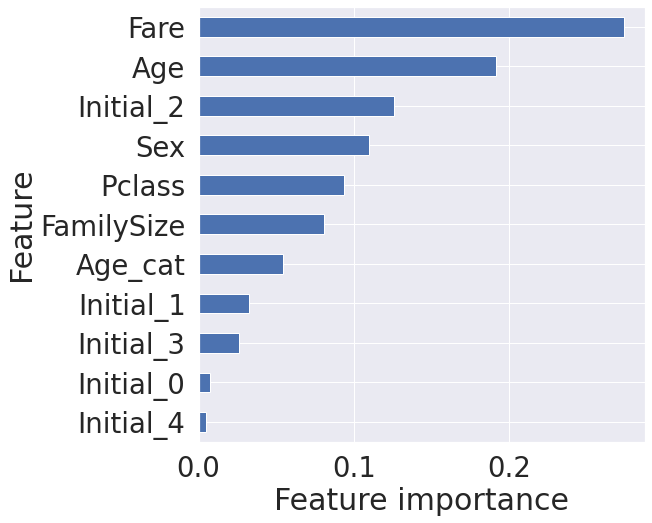

In [59]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [60]:
submission = df_submit

In [61]:
prediction = model.predict(X_test)

In [62]:
prediction

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [63]:
submission['Survived'] = prediction

In [ ]:
submission.to_csv('my_first_submission.csv', index=False)

# 적절한 파라미터 값 찾기

In [64]:
# model = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
# model.fit(X_tr, y_tr)
# prediction = model.predict(X_vld)

In [ ]:
# print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.fformat(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

In [ ]:
# train_score = []
# test_score = []

In [ ]:
#  estimator_list = [10,100,500,1000,3000]
# for estimator in estimator_list:
#   model = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
#   model.fit(X_tr, y_tr)
#   prediction = model.predict(X_vld)
#   #print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))
#   train_score.append(metrics.accuracy_score(prediction, y_vld))

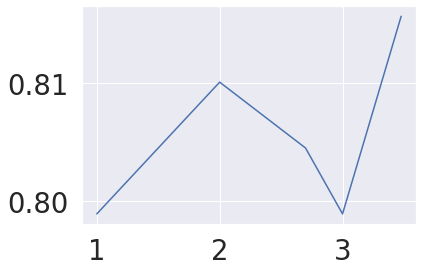

In [ ]:
# plt.plot(np.log10(estimator_list), train_score)
# plt.show()

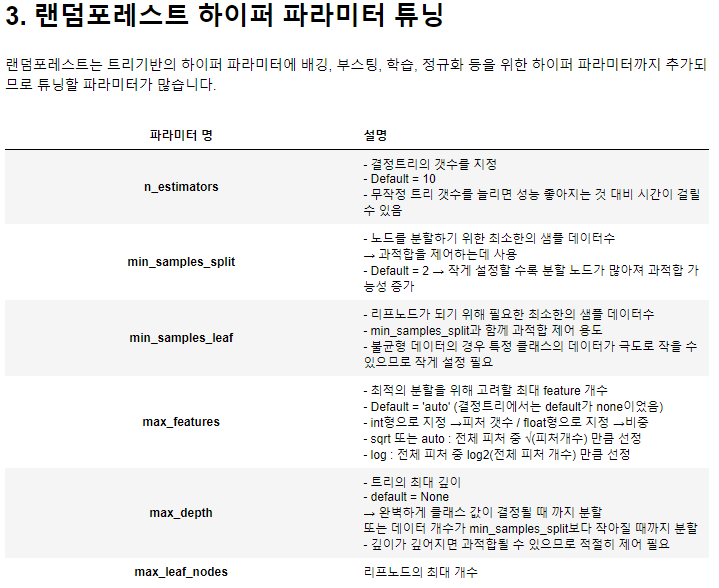

RandomForest의 하이퍼 파라미터 default 상태

In [ ]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

GridSearchCV를 통한 랜덤포레스트의 하이퍼 파라미터 튜닝

In [82]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100, 500],
           'max_depth' : [8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_tr, y_tr)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 500}
최고 예측 정확도: 0.8146


In [69]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [1,2,3,5,10, 100],
           'max_depth' : [2,4,6, 8, 10, 12],
           'min_samples_leaf' : [2,4,6,8, 12, 18],
           'min_samples_split' : [2,4,6,8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_tr, y_tr)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 0.8216


In [75]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [1,2,3,5,10, 100],
           'max_depth' : [2,3,6, 8, 10, 12],
           'min_samples_leaf' : [6,8, 12, 18],
           'min_samples_split' : [6,8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_tr, y_tr)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 0.8160


위의 결과로 나온 최적 하이퍼 파라미터로 다시 학습

In [76]:
model = RandomForestClassifier(n_estimators=10,
                               max_depth = 10,
                               min_samples_leaf = 6,
                               min_samples_split = 8,
                               n_jobs=-1)
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 179명 중 83.80% 정확도로 생존을 맞춤


# 제출할 예측값 측정

In [77]:
prediction_sub = model.predict(X_test)

In [78]:
prediction_sub

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [79]:
submission['Survived'] = prediction_sub
submission.to_csv('add_GridSearchCV_2.csv', index=False)